<a href="https://colab.research.google.com/github/aminhm00/Texture_segmentation/blob/main/Gabor_Filter_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

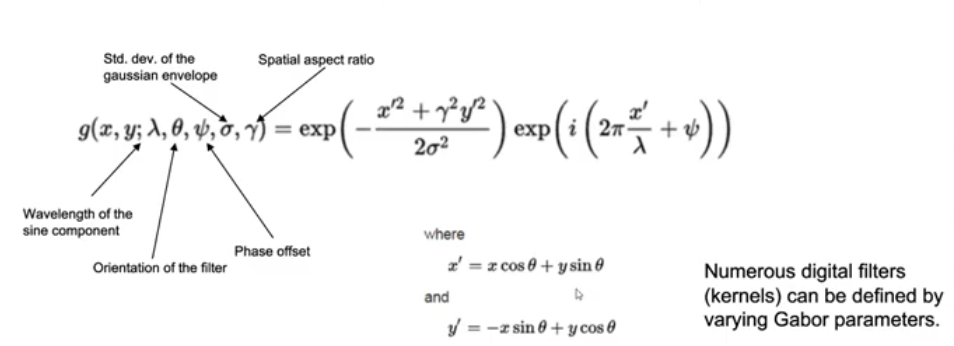



In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
ksize = 40
segma = 3
theta= 1*np.pi / 4
labda= 1*np.pi / 4
gamma= 0.5
phi = 0

kernel = cv2.getGaborKernel((ksize,ksize),segma,theta,labda,gamma,phi, ktype=cv2.CV_32F)

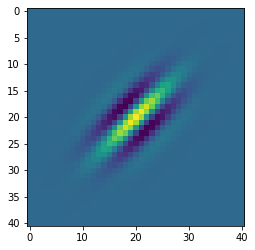

In [18]:
plt.imshow(kernel)

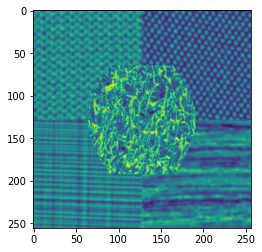

In [19]:
imageRGB= cv2.imread("5TEXT.TIF")
imageGRAY = cv2.cvtColor(imageRGB,cv2.COLOR_BGR2GRAY)
plt.imshow(imageGRAY)

Text(0.5, 1.0, 'this filter detects the edges inclined to the right')

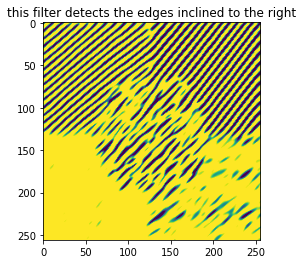

In [22]:
fimg = cv2.filter2D(imageGRAY, cv2.CV_8UC3 , kernel)
plt.imshow(fimg)
plt.title('this filter detects the edges inclined to the right')

<h2>Gabor filters -> Features extraction -> clustering</h2>

In [25]:
df = pd.DataFrame()
img2 = imageGRAY.reshape(-1)
df['original image'] = img2

In [26]:
i = 0
for theta in range(4):
    theta = theta / 4.0 * np.pi
    for segma in (1,3,5,7,9,12):
        for labda in np.arange(0, np.pi , np.pi/4.0):
            for gamma in (0.05 ,0.3, 0.5):
                i+=1
                print(theta, segma, labda,gamma)
                kernel = cv2.getGaborKernel((15,15),segma,theta,labda,gamma,0, ktype=cv2.CV_32F)
                fimg = cv2.filter2D(imageGRAY ,cv2.CV_8UC3,kernel)
                
                kernel2 = np.ones((7,7),np.uint8)
                erosion = cv2.erode(fimg,kernel2,iterations = 1)
                dilation = cv2.dilate(erosion,kernel2,iterations = 1)
                
                blur = cv2.GaussianBlur(dilation,(7,7),0)
                fimg2 = blur.reshape(-1)
                
                #cv2.imwrite("images/"+"gabor" + str(i)+".jpg",blur)
                
                df["gabor {}".format(i)] = fimg2
                

0.0 1 0.0 0.05
0.0 1 0.0 0.3
0.0 1 0.0 0.5
0.0 1 0.7853981633974483 0.05
0.0 1 0.7853981633974483 0.3
0.0 1 0.7853981633974483 0.5
0.0 1 1.5707963267948966 0.05
0.0 1 1.5707963267948966 0.3
0.0 1 1.5707963267948966 0.5
0.0 1 2.356194490192345 0.05
0.0 1 2.356194490192345 0.3
0.0 1 2.356194490192345 0.5
0.0 3 0.0 0.05
0.0 3 0.0 0.3
0.0 3 0.0 0.5
0.0 3 0.7853981633974483 0.05
0.0 3 0.7853981633974483 0.3
0.0 3 0.7853981633974483 0.5
0.0 3 1.5707963267948966 0.05
0.0 3 1.5707963267948966 0.3
0.0 3 1.5707963267948966 0.5
0.0 3 2.356194490192345 0.05
0.0 3 2.356194490192345 0.3
0.0 3 2.356194490192345 0.5
0.0 5 0.0 0.05
0.0 5 0.0 0.3
0.0 5 0.0 0.5
0.0 5 0.7853981633974483 0.05
0.0 5 0.7853981633974483 0.3
0.0 5 0.7853981633974483 0.5
0.0 5 1.5707963267948966 0.05
0.0 5 1.5707963267948966 0.3
0.0 5 1.5707963267948966 0.5
0.0 5 2.356194490192345 0.05
0.0 5 2.356194490192345 0.3
0.0 5 2.356194490192345 0.5
0.0 7 0.0 0.05
0.0 7 0.0 0.3
0.0 7 0.0 0.5
0.0 7 0.7853981633974483 0.05
0.0 7 0.7853981

In [27]:
df.head()

,original image,gabor 1,gabor 2,gabor 3,gabor 4,gabor 5,gabor 6,gabor 7,gabor 8,gabor 9,gabor 10,gabor 11,gabor 12,gabor 13,gabor 14,gabor 15,gabor 16,gabor 17,gabor 18,gabor 19,gabor 20,gabor 21,gabor 22,gabor 23,gabor 24,gabor 25,gabor 26,gabor 27,gabor 28,gabor 29,gabor 30,gabor 31,gabor 32,gabor 33,gabor 34,gabor 35,gabor 36,gabor 37,gabor 38,gabor 39,...,gabor 249,gabor 250,gabor 251,gabor 252,gabor 253,gabor 254,gabor 255,gabor 256,gabor 257,gabor 258,gabor 259,gabor 260,gabor 261,gabor 262,gabor 263,gabor 264,gabor 265,gabor 266,gabor 267,gabor 268,gabor 269,gabor 270,gabor 271,gabor 272,gabor 273,gabor 274,gabor 275,gabor 276,gabor 277,gabor 278,gabor 279,gabor 280,gabor 281,gabor 282,gabor 283,gabor 284,gabor 285,gabor 286,gabor 287,gabor 288
0,71,0,0,0,255,255,255,255,154,83,95,49,22,0,0,0,0,0,0,0,0,0,41,36,28,0,0,0,62,62,61,0,0,0,255,255,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6,5,4
1,68,0,0,0,255,255,255,255,155,86,95,50,23,0,0,0,0,0,0,0,0,0,41,37,28,0,0,0,65,65,63,0,0,0,255,255,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,7,6,4
2,82,0,0,0,255,255,255,255,158,91,95,53,25,0,0,0,0,0,0,0,0,0,43,37,29,0,0,0,73,72,69,0,0,0,255,255,255,0,0,0,...,0,2,0,0,0,0,0,0,0,0,1,1,0,2,2,1,0,0,0,1,0,0,1,1,0,3,3,2,0,0,0,3,3,2,1,0,0,10,8,7
3,32,0,0,0,255,255,255,255,160,96,95,55,28,0,0,0,0,0,0,0,0,0,44,39,31,0,0,0,84,83,79,0,0,0,255,255,255,0,0,0,...,0,5,2,0,0,0,0,0,0,0,1,1,0,6,5,3,0,0,0,3,0,0,1,0,0,8,7,6,0,0,0,15,13,8,1,0,0,15,14,11
4,49,0,0,0,255,255,255,255,162,98,95,57,30,0,0,0,0,0,0,0,0,0,47,42,34,0,0,0,95,93,89,0,0,0,255,255,255,0,0,0,...,0,10,5,0,0,0,0,0,0,0,0,0,0,12,9,5,0,0,0,7,0,0,1,0,0,15,13,10,0,0,0,38,32,22,0,0,0,22,21,18


In [28]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)

In [29]:
X_frame = pd.DataFrame(data=X , columns= df.columns )

X_frame.head()

,original image,gabor 1,gabor 2,gabor 3,gabor 4,gabor 5,gabor 6,gabor 7,gabor 8,gabor 9,gabor 10,gabor 11,gabor 12,gabor 13,gabor 14,gabor 15,gabor 16,gabor 17,gabor 18,gabor 19,gabor 20,gabor 21,gabor 22,gabor 23,gabor 24,gabor 25,gabor 26,gabor 27,gabor 28,gabor 29,gabor 30,gabor 31,gabor 32,gabor 33,gabor 34,gabor 35,gabor 36,gabor 37,gabor 38,gabor 39,...,gabor 249,gabor 250,gabor 251,gabor 252,gabor 253,gabor 254,gabor 255,gabor 256,gabor 257,gabor 258,gabor 259,gabor 260,gabor 261,gabor 262,gabor 263,gabor 264,gabor 265,gabor 266,gabor 267,gabor 268,gabor 269,gabor 270,gabor 271,gabor 272,gabor 273,gabor 274,gabor 275,gabor 276,gabor 277,gabor 278,gabor 279,gabor 280,gabor 281,gabor 282,gabor 283,gabor 284,gabor 285,gabor 286,gabor 287,gabor 288
0,-1.308355,0.0,0.0,0.0,0.0,0.062238,0.604258,0.757264,0.589538,0.475185,0.50078,0.346070,0.070053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001889,-0.081688,-0.258039,0.0,0.0,0.0,0.275548,0.313110,0.361748,0.0,0.0,0.0,0.179736,0.185105,0.198581,0.0,0.0,0.0,...,-1.507039,-1.551433,-1.519973,-1.471691,0.0,0.0,0.0,-1.250632,-1.192654,-1.106981,-1.533131,-1.495270,-1.50379,-1.605522,-1.587893,-1.559492,0.0,0.0,0.0,-1.316363,-1.278962,-1.22432,-1.491016,-1.470109,-1.496319,-1.649319,-1.638301,-1.620056,0.0,0.0,0.0,-1.392984,-1.368236,-1.329294,-1.464136,-1.503903,-1.490473,-1.573912,-1.584890,-1.590114
1,-1.394934,0.0,0.0,0.0,0.0,0.062238,0.604258,0.757264,0.615183,0.572147,0.50078,0.389588,0.136922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001889,-0.036663,-0.258039,0.0,0.0,0.0,0.334371,0.373826,0.404564,0.0,0.0,0.0,0.179736,0.185105,0.198581,0.0,0.0,0.0,...,-1.507039,-1.551433,-1.519973,-1.471691,0.0,0.0,0.0,-1.250632,-1.192654,-1.106981,-1.533131,-1.495270,-1.50379,-1.605522,-1.587893,-1.559492,0.0,0.0,0.0,-1.316363,-1.278962,-1.22432,-1.491016,-1.470109,-1.496319,-1.627169,-1.615321,-1.620056,0.0,0.0,0.0,-1.392984,-1.368236,-1.329294,-1.464136,-1.503903,-1.490473,-1.553921,-1.564535,-1.590114
2,-0.990900,0.0,0.0,0.0,0.0,0.062238,0.604258,0.757264,0.692120,0.733752,0.50078,0.520143,0.270661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080674,-0.036663,-0.206075,0.0,0.0,0.0,0.491235,0.515498,0.533014,0.0,0.0,0.0,0.179736,0.185105,0.198581,0.0,0.0,0.0,...,-1.507039,-1.491569,-1.519973,-1.471691,0.0,0.0,0.0,-1.250632,-1.192654,-1.106981,-1.533131,-1.495270,-1.50379,-1.555272,-1.533987,-1.528926,0.0,0.0,0.0,-1.307655,-1.278962,-1.22432,-1.491016,-1.470109,-1.496319,-1.582870,-1.569362,-1.570952,0.0,0.0,0.0,-1.366524,-1.341946,-1.311922,-1.464136,-1.503903,-1.490473,-1.493950,-1.523825,-1.527023
3,-2.433877,0.0,0.0,0.0,0.0,0.062238,0.604258,0.757264,0.743411,0.895356,0.50078,0.607179,0.471268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121955,0.053387,-0.102149,0.0,0.0,0.0,0.706921,0.738125,0.747098,0.0,0.0,0.0,0.179736,0.185105,0.198581,0.0,0.0,0.0,...,-1.507039,-1.401773,-1.448847,-1.471691,0.0,0.0,0.0,-1.250632,-1.192654,-1.106981,-1.533131,-1.495270,-1.50379,-1.454774,-1.453129,-1.467795,0.0,0.0,0.0,-1.290240,-1.278962,-1.22432,-1.491016,-1.520457,-1.496319,-1.472120,-1.477443,-1.472744,0.0,0.0,0.0,-1.260684,-1.254315,-1.259807,-1.464136,-1.503903,-1.490473,-1.393997,-1.401696,-1.442902
4,-1.943265,0.0,0.0,0.0,0.0,0.062238,0.604258,0.757264,0.794701,0.959997,0.50078,0.694216,0.605007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245799,0.188461,0.053741,0.0,0.0,0.0,0.922608,0.940513,0.961181,0.0,0.0,0.0,0.179736,0.185105,0.198581,0.0,0.0,0.0,...,-1.507039,-1.252113,-1.342159,-1.471691,0.0,0.0,0.0,-1.250632,-1.192654,-1.106981,-1.581229,-1.547934,-1.50379,-1.304026,-1.345318,-1.406663,0.0,0.0,0.0,-1.255410,-1.278962,-1.22432,-1.491016,-1.520457,-1.496319,-1.317070,-1.339565,-1.374536,0.0,0.0,0.0,-1.057823,-1.087817,-1.138203,-1.511616,-1.503903,-1.490473,-1.254063,-1.259213,-1.295689


In [30]:
from sklearn.decomposition import PCA
pca = PCA(.9)
principalComponents = pca.fit_transform(X_frame)
principalDf = pd.DataFrame(data = principalComponents)

In [31]:
pca.explained_variance_ratio_

array([0.48652966, 0.18610596, 0.08327199, 0.06388388, 0.02492376,
       0.02151215, 0.01532278, 0.01201555, 0.01083019])

In [32]:
principalDf.head()

,0,1,2,3,4,5,6,7,8
0,10.677611,1.866012,17.698568,3.177572,0.329828,-0.829239,1.593873,2.626743,5.364419
1,10.547913,1.849994,17.689930,3.178664,0.329653,-0.829193,1.597830,2.645042,5.378699
2,10.191412,1.739491,17.681569,3.281775,0.460800,-0.840669,1.608124,2.641129,5.412303
3,9.687565,1.617019,17.770683,3.173807,0.193453,-0.764069,1.584064,2.668276,5.530489
4,9.165984,1.383236,17.822308,3.337750,0.303814,-0.736694,1.570695,2.591206,5.655956


In [33]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_pred = model.fit_predict(principalDf.values)

In [34]:
cluster_df = pd.concat([pd.DataFrame(imageGRAY.flatten(),columns=['gray']),
                             pd.DataFrame(clusters_pred, columns=['cluster'])], axis=1)

cluster_df.loc[cluster_df.cluster == 0 ,"gray"]=0
cluster_df.loc[cluster_df.cluster == 1 ,"gray"]=50
cluster_df.loc[cluster_df.cluster == 2 ,"gray"]=90
cluster_df.loc[cluster_df.cluster == 3 ,"gray"]=140
cluster_df.loc[cluster_df.cluster == 4 ,"gray"]=190
cluster_df.loc[cluster_df.cluster == 5 ,"gray"]=255

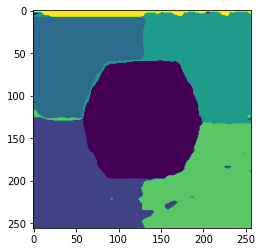

In [35]:
final_texture = cluster_df[cluster_df.columns[:-1]].values
final_texture = final_texture.reshape(imageGRAY.shape)
plt.imshow(final_texture)

DONE !